The World is prone to natural calamities. Some calamities like tsunami and hurricanes cause devastation on a major scale whereas some such as landslides and mudslides are often not given such importance due to their nature and low damage and fatality count. In this project, we intend to analyze global landslide data as acquired by NASA and look into the trends, patterns and how landslides have caused havoc in the last decade from 2008 to 2018. We intend to cluster the types of landslides, based on the cause, region, landslide category and look for inferences that can help us locate geographical locations which are more prone to such natural calamities and how the reporting of these landslides have evolved in the last decade.

Background:
   + Source: data.gov
   + Time Period: 2008 to 2017
   + Data Unit: Global Data
 

There are a total of 31 columns in the dataset which involves various links such as event description, link to the picture of the landslide, distance from the local administration, distance from the gazeteer, local admin population and so on, wich have mostly missing values and columns undefined such as notes, event import source, etc with more than 90% missing data on those columns with lottle to no contribution towards data modeling. Therefore, ommiting these columns in the data being used, we are selecting the columns stated below. The table(1) shows all the data columns whereas table(2) shows the dataframe selected for modeling.


|Column Name | Column Description|
|-----------------|--------------------|
|Source Name | The media agency that reported the event |
|Source Link | The link to the report in the video or news article format |
|Event ID | The unique ID for each Event |
|Event Date | The date on which the event occured
|Event Title | A one line description of the location where the event took place |
|Event Description | Description of the event as reported in the sources |
|Location Description | Descriptor of the location, for ex: mountain, mudslides|
|Location Accuracy | The accuracy with which the event was detected, categorical values: 1, 5, 10,25, 50, 100, exact and unknown |
|Landslide Category | The category to which the landslide belongs. Categories include Landslide, mudslide, debris, earth flow, riverbank collapse, rockfall, snow avalancehe, topple and unknown |
|Landslide Trigger | The trigger which caused the landslide. Categories include rain, downpour, cyclone, dam embankment collapse, earthquake, mining, monsoon, vibrations, volcanic eruptions |
|Landslide Size | Size of landslide ranging from small, medium, large, very large, catastrophic and unknown |
|Fatality count | The number of people injured or deaths reported |
|Country Name | Name of the country where the landslide took place|
|Longitude | Longitude of the place where the event took place|
|Latitude | Latitude of the place where the event took place |



With the landslide data, we want to draw relative trends among the landslides that have taken place in the last decade, perform classification and cluster analysis to derive and see how these events are related to each other. We also want to picturize and deduce the effect of the landslides over the years and if these can be predicted based on the past events.


In [1]:
import pandas as pd
import plotly.express as px

#Original Dataset 
url = 'https://raw.githubusercontent.com/rpatil294/Global-Landslide-Catalog/main/Global_Landslide_Catalog_Export.csv' 
data = pd.read_csv(url, parse_dates=['event_date'])
data.head(5)


,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,injury_count,storm_name,photo_link,notes,event_import_source,event_import_id,country_name,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
0,AGU,https://blogs.agu.org/landslideblog/2008/10/14...,684,2008-08-01 00:00:00,NaN,"Sigou Village, Loufan County, Shanxi Province","occurred early in morning, 11 villagers buried...","Sigou Village, Loufan County, Shanxi Province",unknown,landslide,rain,large,mine,11.0,NaN,NaN,NaN,NaN,glc,684.0,China,CN,Shaanxi,0.0,Jingyang,41.02145,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,107.4500,32.5625
1,Oregonian,http://www.oregonlive.com/news/index.ssf/2009/...,956,2009-01-02 02:00:00,NaN,"Lake Oswego, Oregon",Hours of heavy rain are to blame for an overni...,"Lake Oswego, Oregon",5km,mudslide,downpour,small,unknown,0.0,NaN,NaN,NaN,NaN,glc,956.0,United States,US,Oregon,36619.0,Lake Oswego,0.60342,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-122.6630,45.4200
2,CBS News,https://www.cbsnews.com/news/dozens-missing-af...,973,2007-01-19 00:00:00,NaN,"San Ramon district, 195 miles northeast of the...",(CBS/AP) At least 10 people died and as many a...,"San Ramon district, 195 miles northeast of the...",10km,landslide,downpour,large,unknown,10.0,NaN,NaN,NaN,NaN,glc,973.0,Peru,PE,Junín,14708.0,San Ramón,0.85548,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-75.3587,-11.1295
3,Reuters,https://in.reuters.com/article/idINIndia-41450...,1067,2009-07-31 00:00:00,NaN,Dailekh district,"One person was killed in Dailekh district, pol...",Dailekh district,unknown,landslide,monsoon,medium,unknown,1.0,NaN,NaN,NaN,NaN,glc,1067.0,Nepal,NP,Mid Western,20908.0,Dailekh,0.75395,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,81.7080,28.8378
4,The Freeman,http://www.philstar.com/cebu-news/621414/lands...,2603,2010-10-16 12:00:00,NaN,sitio Bakilid in barangay Lahug,Another landslide in sitio Bakilid in barangay...,sitio Bakilid in barangay Lahug,5km,landslide,tropical_cyclone,medium,unknown,0.0,NaN,Supertyphoon Juan (Megi),NaN,NaN,glc,2603.0,Philippines,PH,Central Visayas,798634.0,Cebu City,2.02204,04/01/2014 12:00:00 AM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,123.8978,10.3336


In [2]:
# Processed data set used for modeling
df = data[['source_name','event_date','location_accuracy', 'landslide_category', 'landslide_trigger', 'landslide_size', 'landslide_setting',
           'fatality_count', 'country_name','country_code', 'longitude', 'latitude']]

In [3]:
# Remove duplicate rows
print ('length before removing duplicates', df.shape[0])
df.drop_duplicates(keep='first', inplace=True)   # Remove rows which are exactly similar, and keeping only the first instance.
print ('length after removing duplicates', df.shape[0])

length before removing duplicates 11033
length after removing duplicates 11011


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [4]:
# Outliers in event_data. Remove values which are less than year 2007 and greater than 2018
##Change event_date it to date-time format, and since 90% of the dates are set to 00:00, seperate the date and time for EDA and modeling and sorting by event_date
df = df[(df['event_date'] > '2007-01-01') & (df['event_date'] <= '2018-01-01')]
df['event_date'] = pd.to_datetime(df['event_date'], infer_datetime_format= True).dt.date
df.sort_values(['event_date'], ascending= True)
df

,source_name,event_date,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,country_name,country_code,longitude,latitude
0,AGU,2008-08-01,unknown,landslide,rain,large,mine,11.0,China,CN,107.450000,32.562500
1,Oregonian,2009-01-02,5km,mudslide,downpour,small,unknown,0.0,United States,US,-122.663000,45.420000
2,CBS News,2007-01-19,10km,landslide,downpour,large,unknown,10.0,Peru,PE,-75.358700,-11.129500
3,Reuters,2009-07-31,unknown,landslide,monsoon,medium,unknown,1.0,Nepal,NP,81.708000,28.837800
4,The Freeman,2010-10-16,5km,landslide,tropical_cyclone,medium,unknown,0.0,Philippines,PH,123.897800,10.333600
...,...,...,...,...,...,...,...,...,...,...,...,...
11028,The Jakarta Post,2017-04-01,5km,landslide,rain,medium,natural_slope,27.0,NaN,NaN,111.679944,-7.853409
11029,Greater Kashmir,2017-03-25,5km,landslide,other,small,natural_slope,2.0,NaN,NaN,75.680611,33.403080
11030,NBC Daily,2016-12-15,1km,landslide,unknown,small,urban,1.0,NaN,NaN,91.772042,26.181606
11031,AGU Landslide Blog,2017-04-29,1km,translational_slide,downpour,large,natural_slope,24.0,NaN,NaN,73.472379,40.886395


In [5]:
# Check null values. Impute in the later cells with appropriate value, or drop if necessary. 
df.isnull().sum()

source_name              0
event_date               0
location_accuracy        2
landslide_category       1
landslide_trigger       23
landslide_size           9
landslide_setting       68
fatality_count        1381
country_name          1552
country_code          1554
longitude                0
latitude                 0
dtype: int64

In [6]:
# We have 1552 events with no country code and and 1554 country names missing, hence dropping them
df = df.dropna(axis=0, subset=['country_name'])
df = df.dropna(axis=0, subset=['country_code'])
df.head()

,source_name,event_date,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,country_name,country_code,longitude,latitude
0,AGU,2008-08-01,unknown,landslide,rain,large,mine,11.0,China,CN,107.4500,32.5625
1,Oregonian,2009-01-02,5km,mudslide,downpour,small,unknown,0.0,United States,US,-122.6630,45.4200
2,CBS News,2007-01-19,10km,landslide,downpour,large,unknown,10.0,Peru,PE,-75.3587,-11.1295
3,Reuters,2009-07-31,unknown,landslide,monsoon,medium,unknown,1.0,Nepal,NP,81.7080,28.8378
4,The Freeman,2010-10-16,5km,landslide,tropical_cyclone,medium,unknown,0.0,Philippines,PH,123.8978,10.3336


In [7]:
### Cleaning for landslide_category 
# Check 'unknown' values in landslide_category, and impute with mode.
print (df['landslide_category'].value_counts())
category_mode = df.mode()['landslide_category'][0]
df['landslide_category'] = df['landslide_category'].str.replace('unknown', category_mode)

landslide              6603
mudslide               1796
rock_fall               470
complex                 232
debris_flow             158
other                    65
unknown                  36
riverbank_collapse       26
snow_avalanche            7
lahar                     7
translational_slide       6
creep                     5
earth_flow                1
Name: landslide_category, dtype: int64


In [8]:
df['landslide_category'] = df['landslide_category'].fillna(value=category_mode)

In [9]:
# Check 'unknown' values in landslide_trigger.
print (df['landslide_trigger'].value_counts())
trigger_mode = df.mode()['landslide_trigger'][0]
# 1688 unknown values, hence dropping them, because imputation will skew the distribution.
df = df[df['landslide_trigger']!='unknown']

downpour                   4390
rain                       1897
unknown                    1532
continuous_rain             549
tropical_cyclone            534
monsoon                     123
earthquake                   76
snowfall_snowmelt            72
mining                       72
construction                 51
flooding                     48
freeze_thaw                  24
no_apparent_trigger          19
other                        15
dam_embankment_collapse       9
volcano                       1
Name: landslide_trigger, dtype: int64


In [10]:
# Only 23 null values, hence imputing with mode value
df['landslide_trigger'] = df['landslide_trigger'].fillna(value=trigger_mode)

In [11]:
# Check 'unknown' values in landslide_size, and impute with mode.
print (df['landslide_size'].value_counts())
size_mode = df.mode()['landslide_size'][0]
# Only 73 'unknown' values, hence imputing with mode value
df['landslide_size'] = df['landslide_size'].str.replace('unknown', size_mode)

medium        5550
small         1620
large          587
very_large      83
unknown         40
Name: landslide_size, dtype: int64


In [12]:
# Only 9 null values in landslide_size, hence imputing with mode value
df['landslide_size'] = df['landslide_size'].fillna(value=size_mode)

In [13]:
print (df['landslide_setting'].value_counts())
# Out of 6031 values are 'unknown', hence dropping this column
del df['landslide_setting']

unknown             5969
above_road          1099
natural_slope        206
urban                153
mine                 119
below_road           102
above_river           66
deforested_slope      44
other                 36
retaining_wall        31
burned_area           27
bluff                 27
engineered_slope       1
Name: landslide_setting, dtype: int64


In [14]:
df['landslide_size'].value_counts()
replace_map = {'landslide_size':{'small':1, 'medium':2, 'large':3, 'very_large':4}}
df.replace(replace_map, inplace=True)
df

,source_name,event_date,location_accuracy,landslide_category,landslide_trigger,landslide_size,fatality_count,country_name,country_code,longitude,latitude
0,AGU,2008-08-01,unknown,landslide,rain,3,11.0,China,CN,107.4500,32.5625
1,Oregonian,2009-01-02,5km,mudslide,downpour,1,0.0,United States,US,-122.6630,45.4200
2,CBS News,2007-01-19,10km,landslide,downpour,3,10.0,Peru,PE,-75.3587,-11.1295
3,Reuters,2009-07-31,unknown,landslide,monsoon,2,1.0,Nepal,NP,81.7080,28.8378
4,The Freeman,2010-10-16,5km,landslide,tropical_cyclone,2,0.0,Philippines,PH,123.8978,10.3336
...,...,...,...,...,...,...,...,...,...,...,...
9939,Inquirer.net,2014-01-12,10km,landslide,tropical_cyclone,2,0.0,Philippines,PH,125.9667,7.6000
10005,The Press Democrat,2011-02-17,unknown,landslide,downpour,1,0.0,United States,US,-122.9542,38.4738
10019,The Press Democrat,2011-03-25,1km,landslide,downpour,2,0.0,United States,US,-122.9955,38.5037
10071,Business Recorder,2013-07-26,5km,landslide,monsoon,2,NaN,Indonesia,ID,123.2322,0.4257


In [15]:
# This code will determine the continent from the countries column which we will be using for EDA and modeling
!pip install pycountry_convert
import pycountry_convert as pc
import numpy as np

df['continent'] = np.nan # Create a continent column

def code_to_continent(x):
    try:
        return pc.country_alpha2_to_continent_code(x)
    except Exception as error:
        print (error)
        
df['continent'] = df.apply(lambda row: code_to_continent(row['country_code']), axis=1)

# Dropping the rows where continent could not be determined
df = df.dropna(axis=0, subset=['continent'])

     |████████████████████████████████| 10.1MB 10.3MB/s 
     |████████████████████████████████| 245kB 42.3MB/s 
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=8159df5b9db9891910800265521c93390a78449301dae4dced10b28e36bee39d
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built pycountry
ERROR: datascience 0.10.6 has requirement coverage==3.7.1, but you'll have coverage 5.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: coveralls 0.5 has requirement coverage<3.999,>=3.6, but you'll have coverage 5.5 which is incompatible.
ERROR: pytest-cov 2.11.1 has requirement pytest>=4.6, but you'll have pytest 3.6.4 which is incompatible.
ERROR: pytest-mock 3.5.1 has requirement pytest>=5.0, but you'll have pytest 3.6.4 which is incompatible.
  Found existing installation: coverage 3.7.

In [16]:
# Linear regression for imputing missing values in the fatality count column

# Only need the following columns for doing regression to impute fatality_count
reg_data = df[['landslide_category', 'landslide_trigger', 'landslide_size', 'country_name', 'fatality_count']]

fatal_nulls = reg_data[df.fatality_count.isnull()]  # Extract rows having null values in fatality_count
main_data = reg_data[~df.fatality_count.isnull()]  # Dataset for training(these rows have values in fatality_count)

# Training data for the algorithm
main_x = main_data.drop('fatality_count', axis=1)
main_y = main_data['fatality_count']

In [17]:
# Check if there are any countries present in the dataframe containing null values for fatality_count, not present
# in the dataframe on which training will occur.

# This dataframe shows all countries present in fatal_nulls
a = fatal_nulls.country_name.value_counts()
a = a.rename_axis('countries').reset_index(name='counts')
# Some countries in this dataframe are not present in the dataframe on which the algorithm will be trained. Hence remove them.

# This data frame shows all the countries present in the training data.
b = main_x.country_name.value_counts()
b = b.rename_axis('countries').reset_index(name='counts')

# This series contains countries not in the training data. 
c = a.apply(lambda x: x['countries'] if x['countries'] not in b['countries'].tolist() else None, axis=1)
countries_not_in_train = c.loc[~c.isnull()]

# Drop the rows from the 'fatal_nulls' which have the countries shown above(i.e., not present in the training data).
fatal_nulls = fatal_nulls[~fatal_nulls['country_name'].isin(countries_not_in_train)]
fatal_nulls.country_name.value_counts()

United States     280
India             250
Philippines       113
China              59
Nepal              59
                 ... 
Argentina           1
Greece              1
Germany             1
American Samoa      1
Serbia              1
Name: country_name, Length: 77, dtype: int64

In [18]:
# Transformer for encoding categorical variables

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

column_trans = make_column_transformer(
        (OneHotEncoder(), ['landslide_category', 'landslide_trigger', 'country_name']), 
        remainder='passthrough')

# Transform and fit the training data
main_x = column_trans.fit_transform(main_x)

In [19]:
# Train a KNN regressor model

from sklearn.model_selection import GridSearchCV
from sklearn import neighbors

# Perform gridsearch and hyperparameter tuning to find the best no. of nearest neighbors.
knn_model = neighbors.KNeighborsRegressor()
params = {'n_neighbors':[63,69,73,79,85,89,93,99,101,109,115,121,127,135,149]}
model = GridSearchCV(knn_model, params, cv=5)
model.fit(main_x,main_y)
model.best_params_

# 121 neighbors is the best parameter determined, after grid search and hyperparameter tuning.

{'n_neighbors': 121}

In [20]:
# Drop the target column, and transform the data to be used for prediction
fatal_x = fatal_nulls.drop('fatality_count', axis=1)
fatal_x = column_trans.transform(fatal_x)

# Get the best model
knn = model.best_estimator_

In [21]:
# Predictions of fatalities for imputations
fatality_preds = np.rint(knn.predict(fatal_x))
fatality_preds

array([0., 0., 0., ..., 1., 3., 3.])

In [22]:
# Add predictions, and create the final cleaned dataset

null_fatalities = df[df.fatality_count.isnull()]  # Extract rows having null values in fatality_count
true_fatalities = df[~df.fatality_count.isnull()] # Extract rows having fatalities

# Drop the rows from the 'null_fatalities' which do not have countries in 'countries_not_in_train'.
null_fatalities = null_fatalities[~null_fatalities['country_name'].isin(countries_not_in_train)]

# Add predictions to null_fatalities
null_fatalities['fatality_count'] = fatality_preds.tolist()

# Join both the dataframes to get the final cleaned dataset.
cleaned_dataset = pd.concat([true_fatalities, null_fatalities])
cleaned_dataset

,source_name,event_date,location_accuracy,landslide_category,landslide_trigger,landslide_size,fatality_count,country_name,country_code,longitude,latitude,continent
0,AGU,2008-08-01,unknown,landslide,rain,3,11.0,China,CN,107.4500,32.5625,AS
1,Oregonian,2009-01-02,5km,mudslide,downpour,1,0.0,United States,US,-122.6630,45.4200,NA
2,CBS News,2007-01-19,10km,landslide,downpour,3,10.0,Peru,PE,-75.3587,-11.1295,SA
3,Reuters,2009-07-31,unknown,landslide,monsoon,2,1.0,Nepal,NP,81.7080,28.8378,AS
4,The Freeman,2010-10-16,5km,landslide,tropical_cyclone,2,0.0,Philippines,PH,123.8978,10.3336,AS
...,...,...,...,...,...,...,...,...,...,...,...,...
9841,blogs.seattletimes,2012-12-04,5km,mudslide,rain,2,0.0,United States,US,-122.2426,47.9595,NA
9864,news.xinhuanet,2008-08-26,50km,landslide,downpour,2,1.0,Panama,PA,-79.4295,9.1559,NA
9870,signonsandiego,2008-05-22,10km,complex,rain,2,1.0,United States,US,-117.6428,33.7112,NA
10071,Business Recorder,2013-07-26,5km,landslide,monsoon,2,3.0,Indonesia,ID,123.2322,0.4257,AS


In [23]:
# Total missing data after the cleaning and processing steps
missing_data = pd.DataFrame({'total_missing': cleaned_dataset.isnull().sum()})
missing_data

,total_missing
source_name,0
event_date,0
location_accuracy,0
landslide_category,0
landslide_trigger,0
landslide_size,0
fatality_count,0
country_name,0
country_code,0
longitude,0


In [24]:
#Listing the number of different sources from where 7992 landslides were reported. Used for EDA
d1 = pd.DataFrame({'Different Sources': df['source_name'].unique()})
d1

,Different Sources
0,AGU
1,Oregonian
2,CBS News
3,Reuters
4,The Freeman
...,...
2987,Trains!Trains!Trains!
2988,www.greaterkashmir.com
2989,SBS (Special Broadcasting Service)
2990,WVNS


In [25]:
# from google.colab import files
# from google.colab import drive
# drive.mount('/content/drive')

# cleaned_dataset.to_csv('cleaned_dataset.csv') 
# files.download('cleaned_dataset.csv')

Exploratory Data Analysis

In [26]:
cleaned_dataset.head()

,source_name,event_date,location_accuracy,landslide_category,landslide_trigger,landslide_size,fatality_count,country_name,country_code,longitude,latitude,continent
0,AGU,2008-08-01,unknown,landslide,rain,3,11.0,China,CN,107.4500,32.5625,AS
1,Oregonian,2009-01-02,5km,mudslide,downpour,1,0.0,United States,US,-122.6630,45.4200,NA
2,CBS News,2007-01-19,10km,landslide,downpour,3,10.0,Peru,PE,-75.3587,-11.1295,SA
3,Reuters,2009-07-31,unknown,landslide,monsoon,2,1.0,Nepal,NP,81.7080,28.8378,AS
4,The Freeman,2010-10-16,5km,landslide,tropical_cyclone,2,0.0,Philippines,PH,123.8978,10.3336,AS


Operation name: Bar graph for fatalities per landslide type


In [27]:
# code for operation
d1 = cleaned_dataset.groupby(['landslide_category'])['fatality_count'].agg('sum')
d1 = d1.to_frame().reset_index()
d1 = d1.rename(columns= {0: 'number'})

In [28]:
# code for display
fig = px.bar(d1, x='landslide_category', y='fatality_count', color='fatality_count', log_y=True, labels={'landslide_category'})
fig.update_layout(
    title="Bar graph for fatalities per landslide type",
    xaxis_title="Landslide Categories",
    yaxis_title="Fatality Count in Log"
)

fig.show()

Pie chart for fatalities per continent

In [29]:
# code for operation
d2 = cleaned_dataset.groupby(['continent'])['fatality_count'].agg('sum')
d2 = d2.to_frame().reset_index()
d2 = d2.rename(columns= {0: 'number'})
d2.head()

,continent,fatality_count
0,AF,1297.0
1,AS,24585.0
2,EU,441.0
3,NA,2022.0
4,OC,209.0


In [30]:
# code for display
fig = px.pie(d2, values='fatality_count', names='continent', title='Percentage of fatalities per continent')
fig.show()

Horizontal stacked bar chart

In [31]:
# code for operation
d = cleaned_dataset.groupby(['continent', 'landslide_category']).size()
d = d.to_frame().reset_index()
d = d.rename(columns= {0: 'number'})
d.head()

,continent,landslide_category,number
0,AF,complex,9
1,AF,landslide,135
2,AF,mudslide,42
3,AF,rock_fall,3
4,AS,complex,98


In [32]:
# code for display
fig = px.bar(d, x="number", y="continent", color="landslide_category", orientation='h',
             height=500)
fig.update_layout(
    title="Horizontal stacked bar chart",
    xaxis_title="No. of incidents",
    yaxis_title="Continents"
)
fig.show()

Operation name: Vertical stacked chart 

In [33]:
# code for operation
d4 = cleaned_dataset.groupby(['landslide_category', 'landslide_size']).size()
d4 = d4.to_frame().reset_index()
d4 = d4.rename(columns= {0: 'number'})
d4.head()

,landslide_category,landslide_size,number
0,complex,1,45
1,complex,2,146
2,complex,3,27
3,complex,4,7
4,creep,1,2


In [34]:
# code for display
fig = px.bar(d4, x="landslide_category", y="number",
             color='landslide_size', barmode='group', log_y=True,
             height=400)
fig.update_layout(
    title="Vertical stacked chart",
    xaxis_title="Landslide Categories",
    yaxis_title="No. of incidents"
)
fig.show()

Line plot for landslides in India

In [35]:
# code for operation
d5 = cleaned_dataset[cleaned_dataset['country_name']=='India']
d5['event_date'] = pd.to_datetime(d5['event_date']).dt.year
d5 = d5.groupby(['event_date']).size()
d5 = d5.to_frame().reset_index()
d5 = d5.rename(columns= {0: 'number'})
d5.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,event_date,number
0,2007,73
1,2008,54
2,2009,52
3,2010,242
4,2011,155


In [36]:
# code for display
fig = px.line(d5, x="event_date", y="number", title='Landslides events in India over the years')
fig.show()

World Map Bubble Plot

In [37]:
import plotly.express as px
fig = px.scatter_mapbox(cleaned_dataset,
                     color="fatality_count",
                     size="fatality_count",
                     lat=cleaned_dataset.latitude,
                     lon=cleaned_dataset.longitude,
                     color_discrete_sequence=["fuchsia"])

# These values can be tried in the mapbox_style argument
# "open-street-map", "carto-positron", "carto-darkmatter", "stamen-terrain", "stamen-toner" or "stamen-watercolor"
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

#######################
# Please zoom out if the map is not visible properly after loading
#######################

Operation name: Histogram of Reporting Sources 

In [38]:
# Code for display of histogram
fig = px.histogram(cleaned_dataset, x=cleaned_dataset['source_name'], color="continent", title = 'Number of Reports from Different Sources')
fig.show()

#This plot can be zommed in to individually look into the source reports and counts

Line plot for landslide frequency in the United States


In [39]:
####Code for Operation
d6 = cleaned_dataset[cleaned_dataset['country_name']=='United States']
d6['event_date'] = pd.to_datetime(d6['event_date'])
d6 = d6.groupby(['event_date']).size()
d6 = d6.to_frame().reset_index()
d6 = d6.rename(columns= {0: 'Number of Landslides'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
#Code for display
fig = px.line(d6, x="event_date", y="Number of Landslides", title='Landslides events in USA over the years')
fig.show()

Monthly Distribution of Global Landslides 


In [41]:
# Code for operation
d7 = pd.DataFrame(cleaned_dataset['event_date'])
d7['event_date'] = pd.to_datetime(df['event_date']).dt.month
d7 = d7.groupby(['event_date']).size()
d7 = d7.to_frame().reset_index()
d7 = d7.rename(columns= {0: 'Number of Landslides'})

In [42]:
#Code for display
fig = px.bar(d7, x="event_date", y="Number of Landslides", text = 'Number of Landslides', title='Monthly Frequency of Landslide Occurences')
fig.show()

Bubble plot for trends in landslide triggers


In [43]:
#Code for Operation
d10 = pd.DataFrame(cleaned_dataset)
d10['event_year'] = pd.to_datetime(d10['event_date']).dt.year

In [44]:
#Code for display
px.scatter(d10, x=d10['event_year'], y= d10['fatality_count'], animation_frame="landslide_trigger", animation_group=d10['continent'],
           size="landslide_size", color="continent", hover_name="continent",
           log_x= False, size_max=55)

# THis is an animated graph, moving the slider gives stats of different calamities over the years and the trends

Modelling

In [75]:
# Cleaned dataset after phase 1
cleaned_dataset.head()

,source_name,event_date,location_accuracy,landslide_category,landslide_trigger,landslide_size,fatality_count,country_name,country_code,longitude,latitude,continent,event_year
0,AGU,2008-08-01,unknown,landslide,rain,3,11.0,China,CN,107.4500,32.5625,AS,2008
1,Oregonian,2009-01-02,5km,mudslide,downpour,1,0.0,United States,US,-122.6630,45.4200,NA,2009
2,CBS News,2007-01-19,10km,landslide,downpour,3,10.0,Peru,PE,-75.3587,-11.1295,SA,2007
3,Reuters,2009-07-31,unknown,landslide,monsoon,2,1.0,Nepal,NP,81.7080,28.8378,AS,2009
4,The Freeman,2010-10-16,5km,landslide,tropical_cyclone,2,0.0,Philippines,PH,123.8978,10.3336,AS,2010


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [46]:
# Removing instances with categories that only appear once.
# This is needed any category belonging to any column should be present in both test and training data. 

cols = ['landslide_category', 'landslide_trigger', 'country_name']
for col in cols:
    cleaned_dataset = cleaned_dataset[cleaned_dataset.groupby(col)[col].transform('count')>1].copy()

Prediction of landslide size

In [50]:
# Replace landslide_size 4 with 3
cleaned_dataset['landslide_size'].replace({4:3}, inplace=True)

In [48]:
# Split into test and train
# Stratifying the split based on the labels in y(landslide_size).
x = cleaned_dataset[['landslide_category','landslide_trigger','country_name', 'latitude', 'longitude']]
y = cleaned_dataset['landslide_size']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42, stratify=y)

In [50]:
# Prepare the column transformer that will perform one hot encoding of categorical features

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


cat_attribs = ['landslide_category','landslide_trigger','country_name']

# handle_unknown = 'ignore' is needed to produce transformed test data with same dimensions as the transformed training data.
full_pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown = 'ignore'), cat_attribs),
    ], remainder='passthrough')

full_pipeline.fit(X_train)
X_train = full_pipeline.transform(X_train)
X_test = full_pipeline.transform(X_test)

In [51]:
# saving ColumnTransformer as a pickle object
import pickle
pickle.dump(full_pipeline, open("size_classification.sav", "wb"))

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

def tune_random_forest(x,y):
  model_params = {
      'n_estimators': [50, 150, 250],
      'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
      'min_samples_split': [2, 4, 6]
  }

  # create random forest classifier model
  rf_model = RandomForestClassifier(random_state=1, oob_score = True)

  # set up grid search meta-estimator
  clf = GridSearchCV(rf_model, model_params, cv=5)

  over = SMOTE(sampling_strategy={1:1500, 3:1000})
  x1, y1 = over.fit_resample(x,y)

  # train the grid search meta-estimator to find the best mode
  clf.fit(x1, y1)
  return clf

clf = tune_random_forest(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
clf.best_score_

0.7179775280898877

In [ ]:
best_rf = clf.best_estimator_
rf_pred = best_rf.predict(X_test)
accuracy_score(y_test, rf_pred)

0.6773446545735238

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from numpy import mean
#model = RandomForestClassifier(n_estimators=1000, class_weight='balanced')

# # evaluate model
# scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

#k_range = list(range(1, 31))
k_range = [1, 15, 21, 25, 31]
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  over = SMOTE(sampling_strategy={1:1500, 3:1000})
  #under = RandomUnderSampler(sampling_strategy=0.5)
  steps = [('over', over), ('model', model)]
  pipeline = Pipeline(steps=steps)
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
  scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
  score = mean(scores)
  print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.680
> k=15, Mean ROC AUC: 0.683
> k=21, Mean ROC AUC: 0.682
> k=25, Mean ROC AUC: 0.681
> k=31, Mean ROC AUC: 0.679


In [ ]:
# Try out the best knn model
knn = KNeighborsClassifier(n_neighbors=15)
over = SMOTE(sampling_strategy={1:1500, 3:1000})
x1, y1 = over.fit_resample(X_train, y_train)
counter = Counter(y1)
print(counter)

knn.fit(x1, y1)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



Counter({2: 3730, 1: 1500, 3: 1000})


0.672327286761868

Neural Network

In [58]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
import keras


def base_model():
  model = Sequential()
  model.add(Dense(32, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
 
# Perform SMOTE
# Increase the samples of class 1 to 1500, and 3 to 1200.
over = SMOTE(sampling_strategy={1:1500, 3:1200})
x1, y1 = over.fit_resample(X_train, y_train)
y1 = pd.Series(y1)

yTrain = y1.subtract(1)
yTest = y_test.subtract(1)
yTrain = to_categorical(np.array(yTrain.to_list()))
yTest = to_categorical(np.array(yTest.to_list()))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [59]:
# Train the model
estimator2 = KerasClassifier(build_fn=base_model, epochs=200, batch_size=5, verbose=0)
estimator2.fit(x1, yTrain)

In [127]:
# Predict and get classification accuracy on training data

ytrain_pred = estimator2.predict(x1)
accuracy_score(y1.subtract(1), ytrain_pred)

# Train data accuracy = 63.9%

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



0.6396578538102644

In [105]:
# Predict and get classification accuracy on test data

ytest_pred = estimator2.predict(X_test)
accuracy_score(y_test.subtract(1), ytest_pred)

# Test data accuracy = 68.9%

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



0.689309147047472

In [80]:
# Save the neural network model

estimator2.model.save('my_nn.h5')

Predict Landslide Type: Random Forests

In [56]:
# Split into test and train
x = cleaned_dataset[['landslide_trigger', 'location_accuracy', 'country_name', 'landslide_size']]
y = cleaned_dataset['landslide_category']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42, stratify=y)

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


cat_attribs = ['landslide_trigger','location_accuracy', 'country_name', 'landslide_size' ]

# handle_unknown = 'ignore' is needed to produce transformed test data with same dimensions as the transformed training data.
full_pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown = 'ignore'), cat_attribs),
    ], remainder='passthrough')

full_pipeline.fit(X_train)
X_train = full_pipeline.transform(X_train)
X_test = full_pipeline.transform(X_test)

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

def tune_random_forest(x,y):
  model_params = {
      'n_estimators': [50, 150, 250],
      'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
      'min_samples_split': [2, 4, 6]
  }

  # create random forest classifier model
  rf_model = RandomForestClassifier(random_state=1, oob_score = True)

  # set up grid search meta-estimator
  clf = GridSearchCV(rf_model, model_params, cv=5)

  # train the grid search meta-estimator to find the best mode
  clf.fit(x, y)
  return clf

clf = tune_random_forest(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



In [59]:
# Best training accuracy
clf.best_score_

0.7119771863117871

In [60]:
# Get the best model
best_rf = clf.best_estimator_

# Predictions and accuracy for test data
rf_pred = best_rf.predict(X_test)
accuracy_score(y_test, rf_pred)

0.7163257429563875

In [71]:
# saving ColumnTransformer and model as a pickle object
import pickle
pickle.dump(full_pipeline, open("type_classification_encoder.sav", "wb"))
pickle.dump(best_rf, open("rf_model.sav", "wb"))

Clustering

In [64]:
from time import time
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

data1 = cleaned_dataset[['landslide_size','landslide_trigger','country_name', 'landslide_category', 'fatality_count']]


cat_attribs = ['landslide_category','landslide_trigger','country_name', 'landslide_size']
# handle_unknown = 'ignore' is needed to produce transformed test data with same dimensions as the transformed training data.
full_pipeline = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown = 'ignore'), cat_attribs),
    ], remainder='passthrough')

full_pipeline.fit(data1)
X_train = full_pipeline.transform(data1)

k_means = KMeans(init = 'random',max_iter=300, tol = 1e-04, random_state = 22)
param_grid = dict(n_clusters = [7,8,9], n_init = [10,20,25])
#param_grid = dict(n_clusters = [8], n_init = [20])

model_k = GridSearchCV(estimator=k_means, param_grid=param_grid)
model_k.fit(X_train)
model_k.best_estimator_

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=8,
       n_init=20, n_jobs=None, precompute_distances='auto', random_state=22,
       tol=0.0001, verbose=0)

In [77]:
y_vals = model_k.best_estimator_.predict(X_train)

No handles with labels found to put in legend.


[]

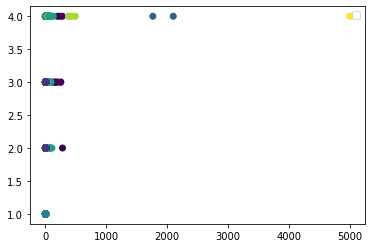

In [79]:
xAxis = cleaned_dataset["fatality_count"]
yAxis = cleaned_dataset["landslide_size"]

plt.scatter(xAxis, yAxis, c=y_vals)
plt.legend()
plt.plot()

In [ ]:
# KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=8,
#        n_init=20, n_jobs=None, precompute_distances='auto', random_state=22,
#        tol=0.0001, verbose=0)

In [66]:
import matplotlib.pyplot as plt

plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

NameError: ignored